## N-Grams

**N-grams** are one of the fundamental concepts every data scientist and computer science professional must know while working with text data. N-grams are continuous sequences of words or symbols, or tokens in a document. In technical terms, they can be defined as the neighboring sequences of items in a document. They come into play when we deal with text data in NLP (Natural Language Processing) tasks. They have a wide range of applications, like language models, semantic features, spelling correction, machine translation, text mining, etc.

### How Are N-Grams Classified?

Generally, we used to store such values in a variable declared as ‘n’! Apart from programming, you must have extensively encountered ‘n’ in the formulae of the sum of series and so on. Summing up, ‘n’ is just a variable that can have positive integer values, including 1,2,3, and so on.’n’ basically refers to multiple.
Thinking along the same lines, n-grams are classified into the following types, depending on the value that ‘n’ takes.

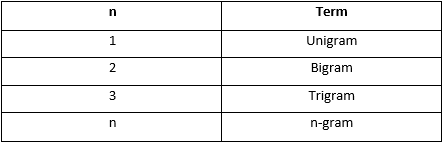

### Why do we need many different types of N-Grams?
As clearly depicted in the table above, when n=1, it is said to be a unigram. When n=2, it is said to be a bigram, and so on. This is because different types of n-grams are suitable for different types of applications. You should try different n-grams on your data in order to confidently conclude which one works the best among all for your text analysis. For instance, research has substantiated that trigrams and 4 grams work the best in the case of spam filtering. 

### Example of N-Grams
Let’s understand n-grams practically with the help of the following sample sentence:
“I reside in Fort Wayne”

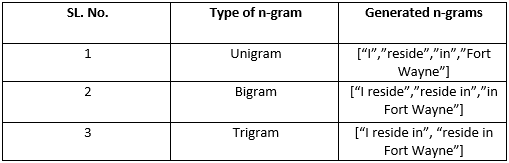


In [11]:
import nltk
from nltk import *
sentence = 'I reside in Fort Wayne.'
n = 1
unigrams = ngrams(sentence.split(), n)
for grams in unigrams:
    print(grams)

('I',)
('reside',)
('in',)
('Fort',)
('Wayne.',)


From the table above, it is clear that unigram means taking only one word at a time, bigram means taking two words at a time, and trigram means taking three words at a time. 

### Step-By-Step Implementation of N-Grams in Python


#### Step 1: Explore the Dataset
We will be using sentiment analysis for the financial news dataset. The sentiments are from the perspective of retail investors. It is an open-source Kaggle dataset.

In [12]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')

df=pd.read_csv('all_data.csv',encoding = "ISO-8859-1")
df.columns =['Sentiment', 'News Headline']
print(df.head())

  Sentiment                                      News Headline
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4845 non-null   object
 1   News Headline  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


We can see that the dataset has 4845 rows and two columns, namely,’ Sentiment’ and ‘News Headline.’

In [14]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

The data is perfect with absolutely no missing values!

In [15]:
df['Sentiment'].value_counts()

Sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

We can undoubtedly infer that the dataset includes three categories of sentiments:<br>

**1. Neutral**<br>
**2. Positive**<br>
**3. Negative**<br>

Out of 4845 sentiments, 2878 have been found to be neutral, 1363 positive, and the rest negative.

#### Step 2: Feature Extraction
Our objective is to predict the sentiment of a given news headline. Obviously, the ‘News Headline’ column is our only feature, and the ‘Sentiment’ column is our target variable.

In [16]:
y=df['Sentiment'].values
y.shape
x=df['News Headline'].values
x.shape

(4845,)

Both the outputs return a shape of (4845,) which means 4846 rows and 1 column as we have 4845 rows of data and just 1 feature and a target for x and y, respectively.

#### Step 3: Train-Test Split
In any machine learning, deep learning, or NLP(Natural Language Processing) task, splitting the data into train and test is indeed a highly crucial step. The train_test_split() method provided by sklearn is widely used for the same. So, let’s begin by importing it:

In [17]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

Our next step is to convert these NumPy arrays to Pandas data frames and thus create two data frames, namely,df_train and df_test. The former is created by concatenating x_train and y_train arrays. The latter data frame is created by concatenating x_test and y_test arrays. 

In [18]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,3 January 2011 - Scandinavian lenders Sampo Ba...,neutral
1,He said things will be different when new Finn...,neutral
2,The contract also includes cutting and edging ...,neutral
3,"The payment date is March 25 , 2010 .",neutral
4,Stora Enso R shares rose 1.20 pct to 11.84 eur...,positive


In [19]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,"As the largest elevator market in the world , ...",neutral
1,Homeowners across North America have green exp...,neutral
2,"Also , a six-year historic analysis is provide...",neutral
3,Lee & Man Paper and Metso have a long and pros...,neutral
4,The earnings per share for the quarter came in...,positive


#### Step 4: Basic Pre-Processing of Train and Test Data
In order to pre-process our text data, we will remove punctuations in train and test data for the ‘news’ column using punctuation provided by the string library.

In [20]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))

df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,3 January 2011 Scandinavian lenders Sampo Ban...,neutral
1,He said things will be different when new Finn...,neutral
2,The contract also includes cutting and edging ...,neutral
3,The payment date is March 25 2010,neutral
4,Stora Enso R shares rose 120 pct to 1184 eur ...,positive


Comparing the above output with the previous output of df_train, we observe that punctuations have been successfully removed from the text present in the feature column (news column) of the training dataset. Similarly, from the above codes, punctuations will be removed successfully from the news column of the test data frame as well. 

As a next step, we have to remove stopwords from the news column. For this, let’s use the stopwords provided by nltk as follows:

In [21]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

#### Step 5: Code to Generate N-grams

Let us create a custom function to generate n-grams for a given text:

In [22]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

The above function inputs two parameters, namely, text and ngram, which refer to the text data for which we want to generate a given number of n-grams and the number of grams to be generated, respectively. Firstly, word tokenization is done where the stop words are ignored, and the remaining words are retained.

#### Step 6: Creating Unigrams
Let’s follow the steps below to create unigrams for the news column of the df_train data frame:

1. Create unigrams for each of the news records belonging to each of the three categories of sentiments.<br>
2. Store the word and its count in the corresponding dictionaries.<br>
3. Convert these dictionaries to corresponding data frames.<br>
4. Fetch the top 10 most frequently used words.<br>
5. Visualize the most frequently used words for all the 3 categories-positive, negative and neutral.<br>

Let us have a look at the code to understand the steps better:

Sentence after removing stopwords: ['Stora', 'Enso', 'R', 'shares', 'rose', '120', 'pct', '1184', 'eur', '', 'UPMKymmene', 'also', 'dragged', 'higher', '', 'rising', '168', 'pct', '1756', 'eur', 'MReal', 'B', 'added', '238', 'pct', '430', 'eur', '']
Sentence after removing stopwords: ['Turnover', 'rose', 'EUR21m', 'EUR17m', '']
Sentence after removing stopwords: ['Net', 'sales', 'totaled', 'EUR', '936', 'mn', '', 'EUR', '932', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['', 'I', 'pleased', 'proud', 'performance', 'last', 'year', '', '', 'Chief', 'Executive', 'Juha', 'Rantanen', 'said', 'statement', '']
Sentence after removing stopwords: ['Metsaliitto', 'said', 'book', 'minor', 'gain', 'less', 'EUR1', '0', 'transaction', '']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper', '']
Sentence after removing stopwords: ['Lemcon', 'als

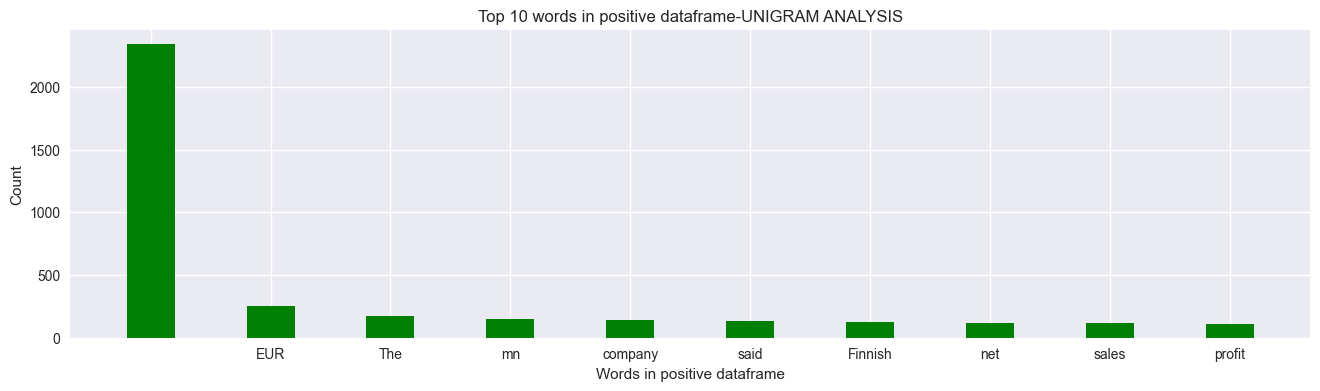

In [23]:
from collections import defaultdict

positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1
    
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1
    
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1
    
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

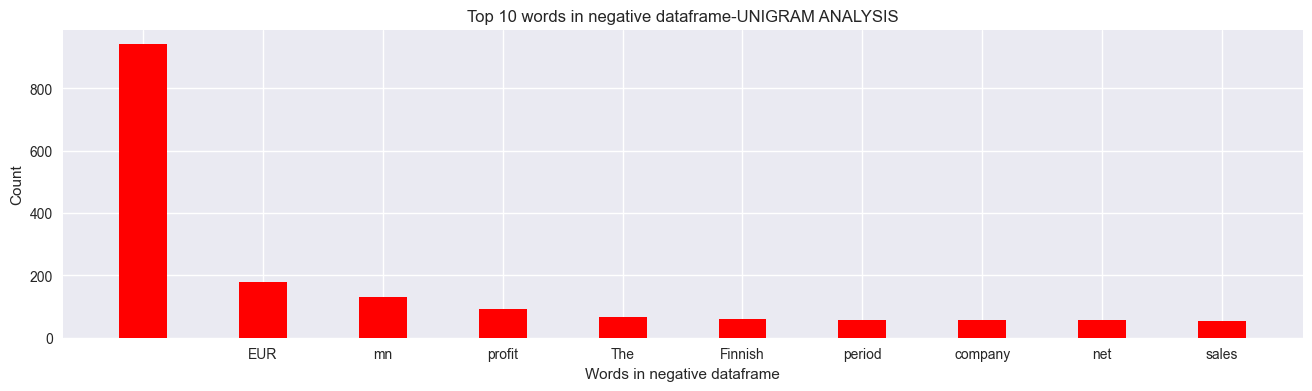

In [24]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

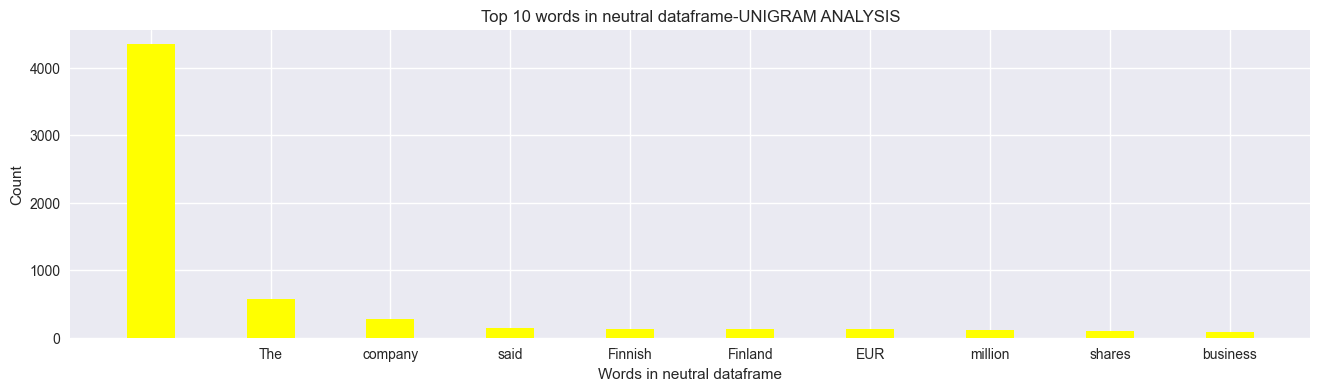

In [25]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

#### Step 7: Creating Bigrams

Repeating the same steps which we followed to analyze our data using unigrams, except that we have to pass the parameter **2** while invoking the generate_N_grams() function.

Sentence after removing stopwords: ['Stora', 'Enso', 'R', 'shares', 'rose', '120', 'pct', '1184', 'eur', '', 'UPMKymmene', 'also', 'dragged', 'higher', '', 'rising', '168', 'pct', '1756', 'eur', 'MReal', 'B', 'added', '238', 'pct', '430', 'eur', '']
Sentence after removing stopwords: ['Turnover', 'rose', 'EUR21m', 'EUR17m', '']
Sentence after removing stopwords: ['Net', 'sales', 'totaled', 'EUR', '936', 'mn', '', 'EUR', '932', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['', 'I', 'pleased', 'proud', 'performance', 'last', 'year', '', '', 'Chief', 'Executive', 'Juha', 'Rantanen', 'said', 'statement', '']
Sentence after removing stopwords: ['Metsaliitto', 'said', 'book', 'minor', 'gain', 'less', 'EUR1', '0', 'transaction', '']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper', '']
Sentence after removing stopwords: ['Lemcon', 'als

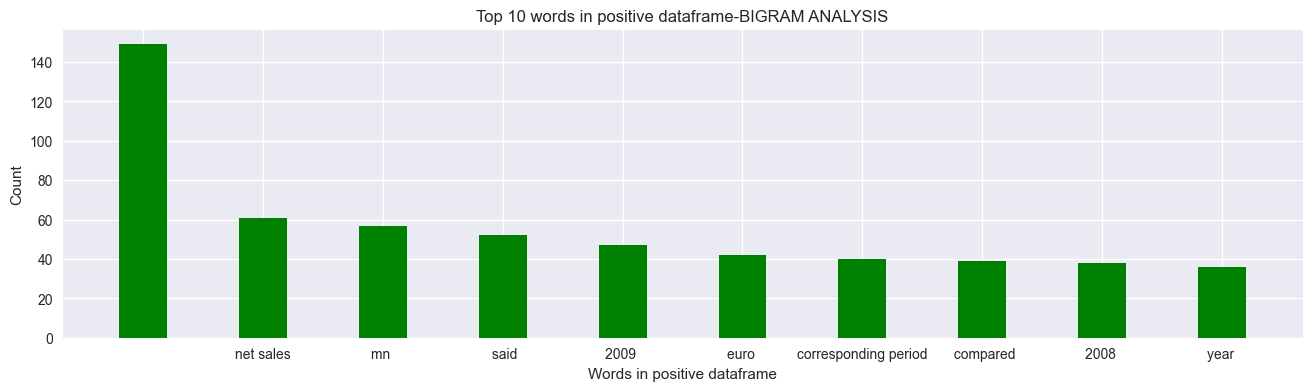

In [26]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1
    
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1
    
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1
    
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

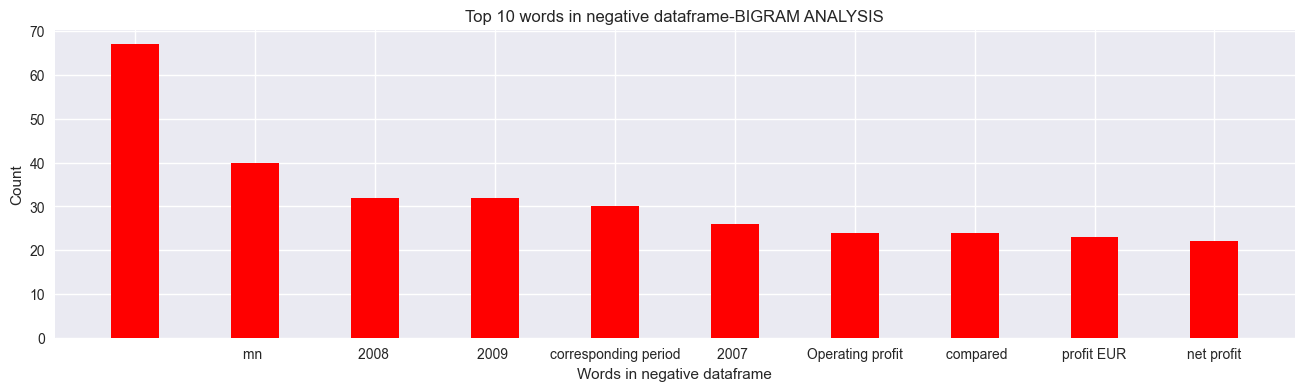

In [27]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

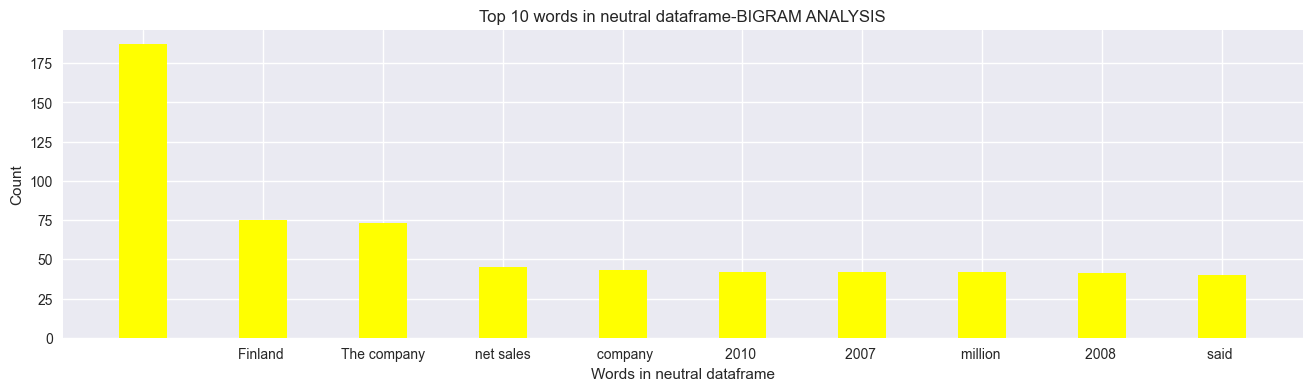

In [28]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

#### Step 8: Creating Trigrams

Repeating the same steps which we followed to analyze our data using unigrams, except that we have to pass the parameter **3** while invoking the generate_N_grams() function.

Sentence after removing stopwords: ['Stora', 'Enso', 'R', 'shares', 'rose', '120', 'pct', '1184', 'eur', '', 'UPMKymmene', 'also', 'dragged', 'higher', '', 'rising', '168', 'pct', '1756', 'eur', 'MReal', 'B', 'added', '238', 'pct', '430', 'eur', '']
Sentence after removing stopwords: ['Turnover', 'rose', 'EUR21m', 'EUR17m', '']
Sentence after removing stopwords: ['Net', 'sales', 'totaled', 'EUR', '936', 'mn', '', 'EUR', '932', 'mn', 'corresponding', 'period', '2005', '']
Sentence after removing stopwords: ['', 'I', 'pleased', 'proud', 'performance', 'last', 'year', '', '', 'Chief', 'Executive', 'Juha', 'Rantanen', 'said', 'statement', '']
Sentence after removing stopwords: ['Metsaliitto', 'said', 'book', 'minor', 'gain', 'less', 'EUR1', '0', 'transaction', '']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper', '']
Sentence after removing stopwords: ['Lemcon', 'als

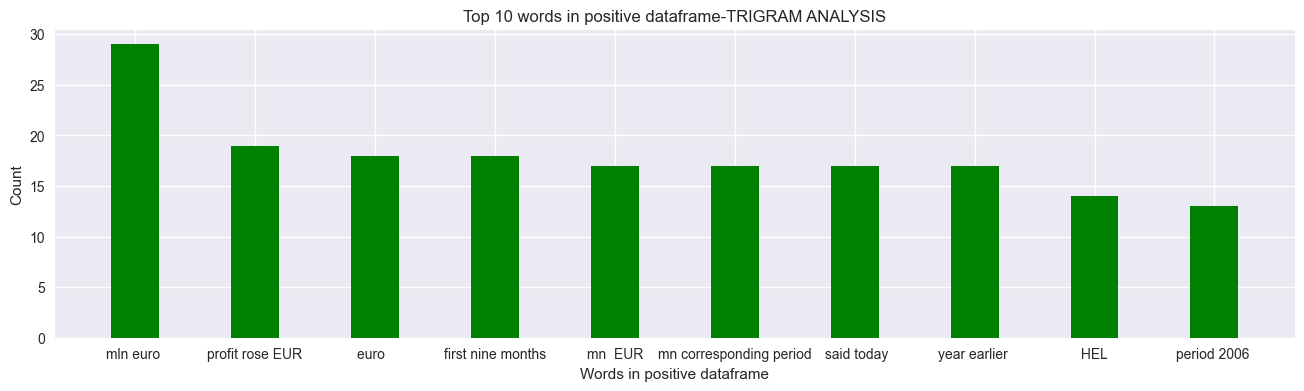

In [29]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1
    
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green', width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

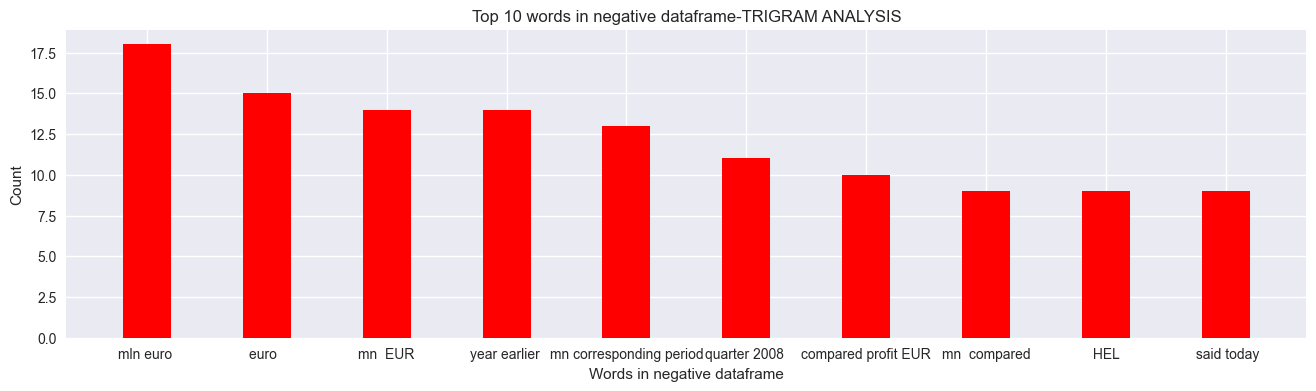

In [30]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

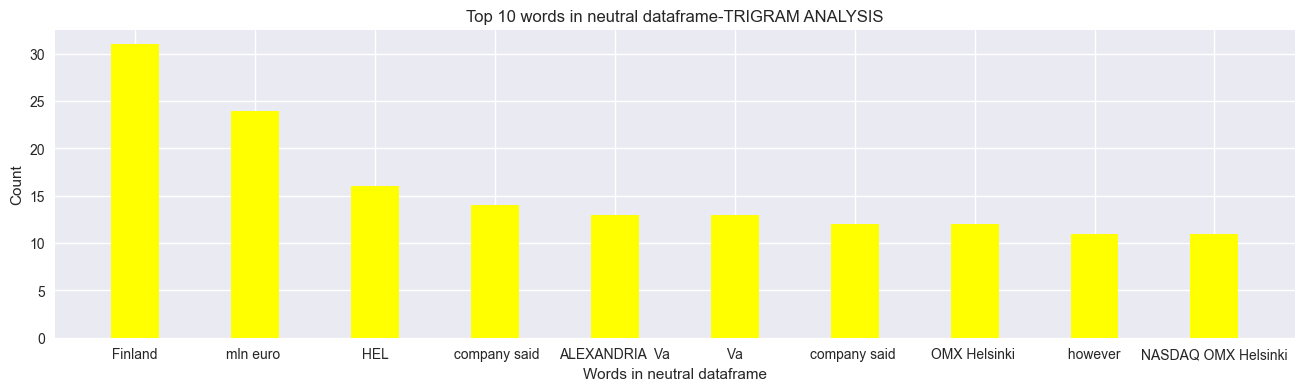

In [31]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()

### Conclusion

**N-Grams** are one of the most powerful techniques for extracting features from the text while working on a text problem. In this chapter, we have successfully learned what N-Grams are and how we can generate N-Grams for a given text dataset easily in Python. We also understood the applications of N-Grams in NLP and generated N-Grams in the case study of sentiment analysis.

Key Takeaways:

1. N-Grams are the most powerful technique to extract the features from the text.<br>
2. N-Grams have a wide range of applications in language models, spelling correctors, text classification problems, and more.<br>